In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn
import pesummary
import os
from pesummary.io import read
#print(pesummary.__version__)
import h5py
from scipy import stats
#from pesummary.utils.samples_dict import SamplesDict
from pesummary.utils.samples_dict import Array
%config InlineBackend.figure_format = 'retina'
plt.rcParams['figure.figsize'] = [10, 7]

In [2]:
file_name = './GW190803_022701CT/GW190803_022701_comoving.h5'

In [3]:
data = read(file_name, package = 'core')
print('Found run labels:')
print(data.labels)

Found run labels:
['C01:IMRPhenomD', 'C01:IMRPhenomPv2', 'C01:NRSur7dq4', 'C01:SEOBNRv4P', 'C01:SEOBNRv4P_nonevol', 'PrecessingSpinIMR', 'PrecessingSpinIMRHM', 'PublicationSamples', 'ZeroSpinIMR']


In [4]:
samples_dict = data.samples_dict
posterior_samples = samples_dict['C01:IMRPhenomPv2']
parameters = sorted(list(posterior_samples.keys()))
print(parameters)

['H1_matched_filter_abs_snr', 'H1_matched_filter_snr', 'H1_matched_filter_snr_angle', 'H1_optimal_snr', 'H1_spcal_amp_0', 'H1_spcal_amp_1', 'H1_spcal_amp_2', 'H1_spcal_amp_3', 'H1_spcal_amp_4', 'H1_spcal_amp_5', 'H1_spcal_amp_6', 'H1_spcal_amp_7', 'H1_spcal_amp_8', 'H1_spcal_amp_9', 'H1_spcal_phase_0', 'H1_spcal_phase_1', 'H1_spcal_phase_2', 'H1_spcal_phase_3', 'H1_spcal_phase_4', 'H1_spcal_phase_5', 'H1_spcal_phase_6', 'H1_spcal_phase_7', 'H1_spcal_phase_8', 'H1_spcal_phase_9', 'H1_time', 'L1_matched_filter_abs_snr', 'L1_matched_filter_snr', 'L1_matched_filter_snr_angle', 'L1_optimal_snr', 'L1_spcal_amp_0', 'L1_spcal_amp_1', 'L1_spcal_amp_2', 'L1_spcal_amp_3', 'L1_spcal_amp_4', 'L1_spcal_amp_5', 'L1_spcal_amp_6', 'L1_spcal_amp_7', 'L1_spcal_amp_8', 'L1_spcal_amp_9', 'L1_spcal_phase_0', 'L1_spcal_phase_1', 'L1_spcal_phase_2', 'L1_spcal_phase_3', 'L1_spcal_phase_4', 'L1_spcal_phase_5', 'L1_spcal_phase_6', 'L1_spcal_phase_7', 'L1_spcal_phase_8', 'L1_spcal_phase_9', 'L1_time', 'V1_matched

In [5]:
mchirp = Array(posterior_samples['chirp_mass'])

<Figure size 720x504 with 0 Axes>

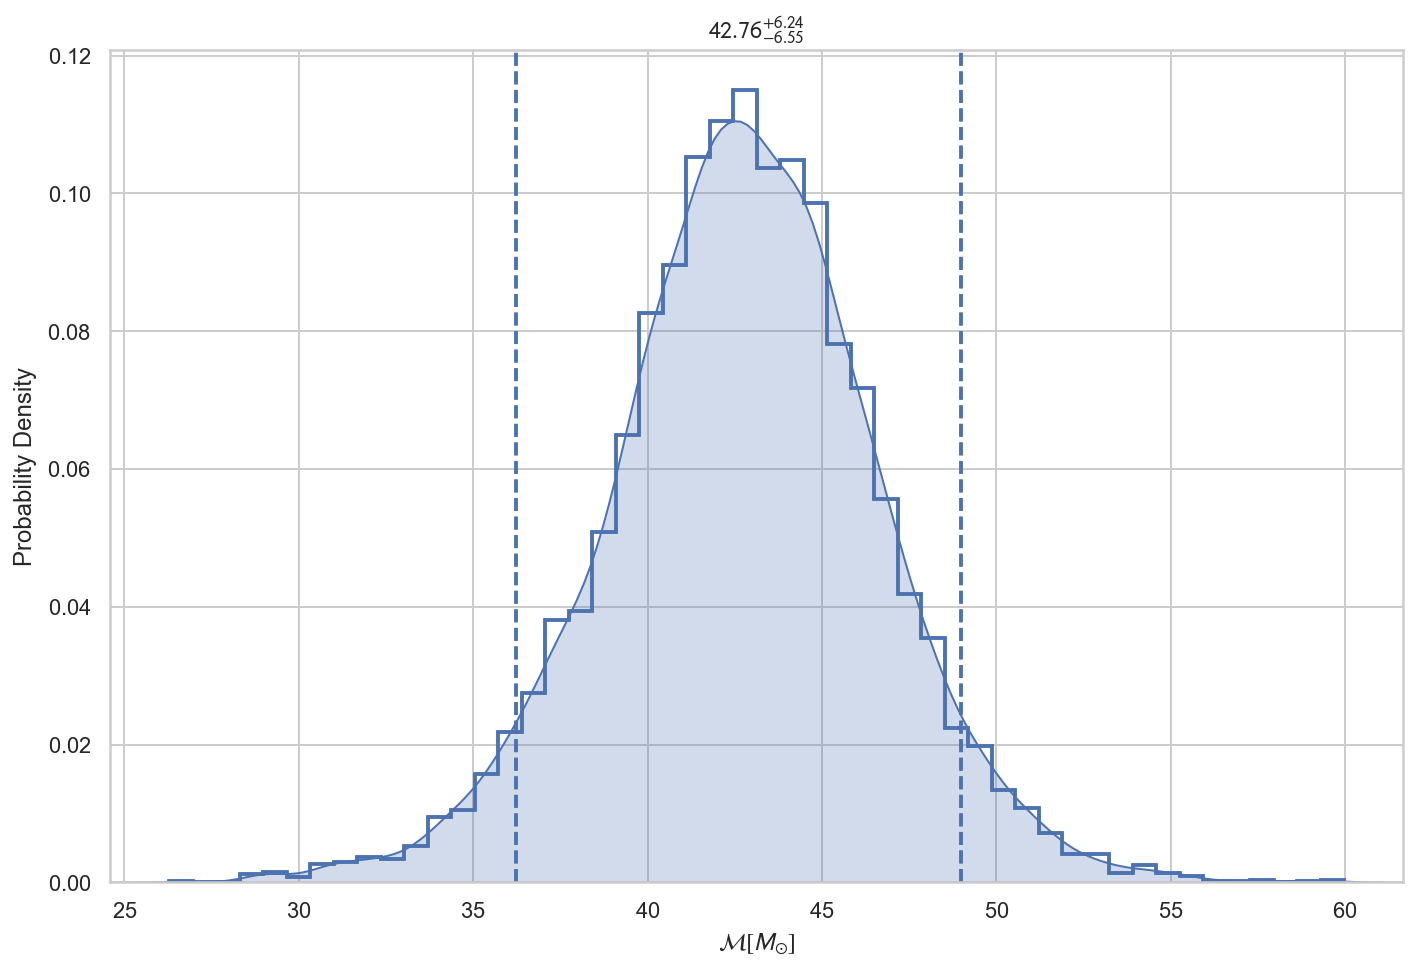

In [6]:
plt.figure(1)
fig = posterior_samples.plot('chirp_mass', type = 'hist')
posterior_samples.plot('chirp_mass', type='hist',fig=fig, kde=True)
fig.show()
plt.savefig('./FIGURES/GW190803_022701figs/GW190803_022701_hist')

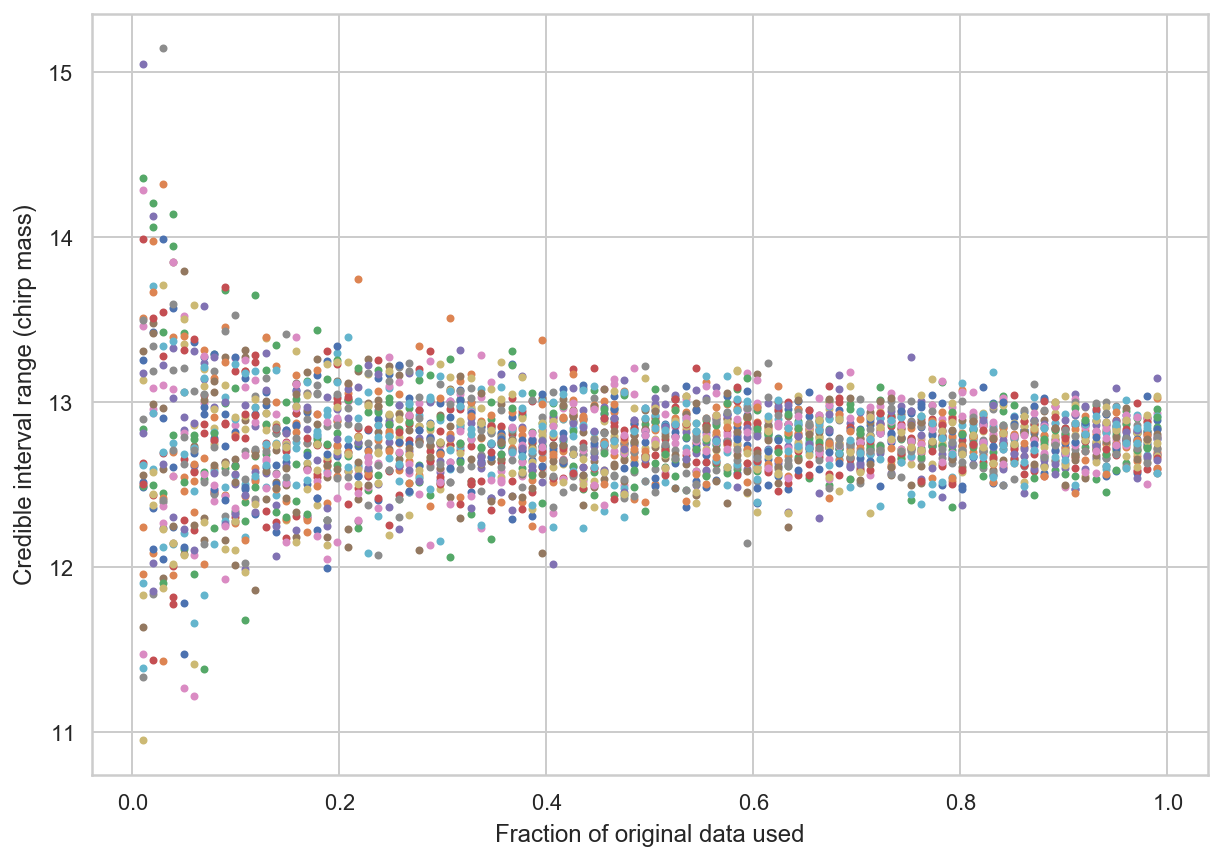

In [9]:
for level in np.linspace(0.01,0.99,num=100):
    N=0
    while (N<30):
        new_array=np.random.choice(mchirp,size=int(level*len(mchirp)))
        conf=np.percentile(new_array, (5, 95))
        N+=1
        plt.figure(3)
        plt.plot(level, (conf[1]-conf[0]), '.')
        plt.xlabel('Fraction of original data used')
        plt.ylabel('Credible interval range (chirp mass)')

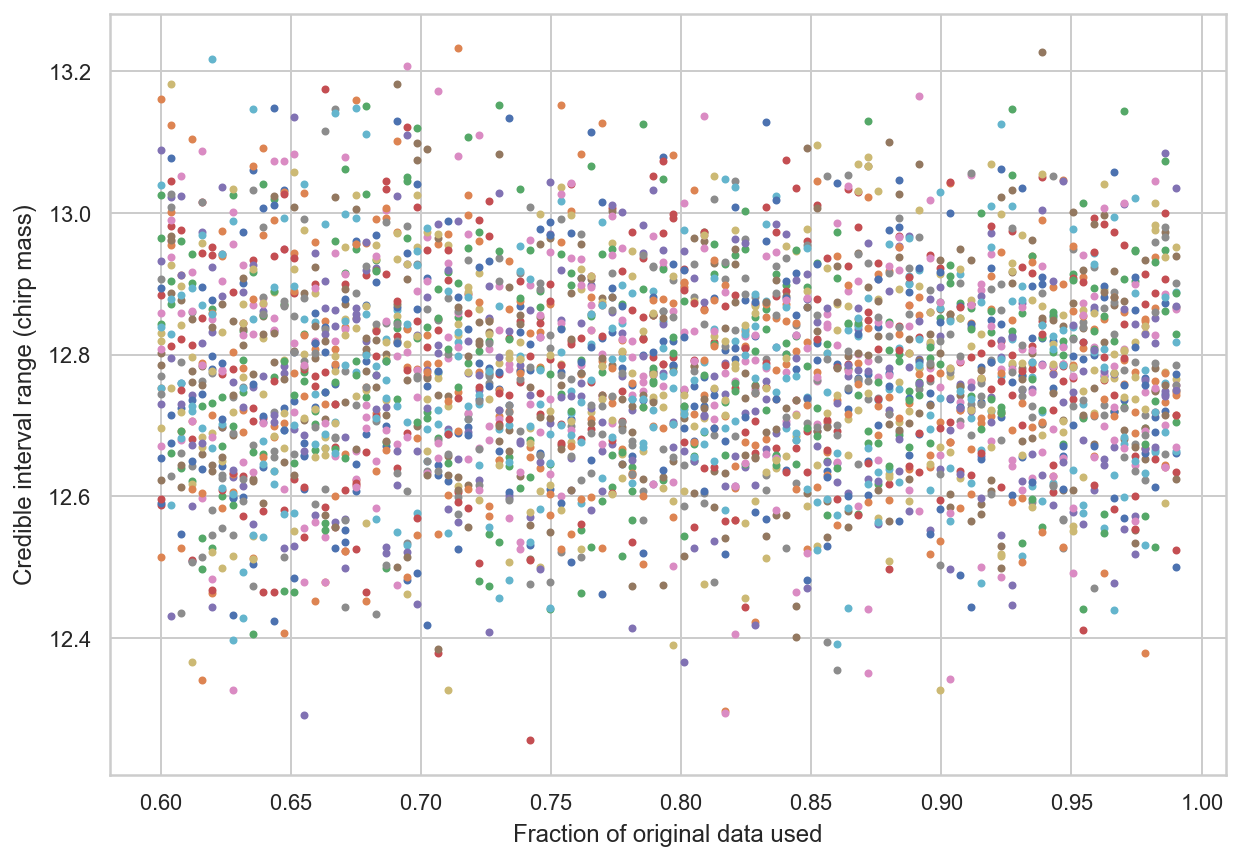

In [10]:
for level in np.linspace(0.6,0.99,num=100):
    N=0
    while (N<30):
        new_array=np.random.choice(mchirp,size=int(level*len(mchirp)))
        conf=np.percentile(new_array, (5, 95))
        N+=1
        plt.figure(2)
        plt.plot(level, (conf[1]-conf[0]), '.')
        plt.xlabel('Fraction of original data used')
        plt.ylabel('Credible interval range (chirp mass)')